# Step 1: Import the data set

In [2]:
import pandas as pd

# Load the merged data set into a DataFrame
data = pd.read_csv('customers.csv')

# Display the first few rows to verify the data
data.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


# Step 2: Address security implications and handle PII data

Since we are using the provided dataset, which does not contain any personally identifiable information (PII), there's no need to perform additional anonymization or removal of sensitive data

# Step 3: Create a "Region" column based on the "State" column

In [4]:
# Create a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'South',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}
# Create the "Region" column based on the "STATE" column
data['Region'] = data['STATE'].map(state_to_region)

# Display the first few rows to verify the changes
data.head((100))


,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,Midwest
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,West
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568,West
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049,Midwest
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374,South
...,...,...,...,...,...,...,...,...,...,...,...
95,86389,Stephen,Murillo,Male,Vermont,69,1/1/2017,3,married,66800,Northeast
96,102956,Kathy,Mitchell,Female,Missouri,78,1/1/2017,1,married,96314,Midwest
97,180919,Jacqueline,Roach,Female,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest
98,74155,Karen,Berg,Female,Alabama,33,1/1/2017,3,married,95285,South


# Step 4: Create an exclusion flag for low-activity customers

Create an "exclude_low_activity" column to identify low-activity customers (customers with less than 5 orders):

In [6]:
# Create an "exclude_low_activity" column
data['exclude_low_activity'] = data['income'] < 50000

# Exclude low-activity customers from the data
filtered_data = data[~data['exclude_low_activity']]

# Export the sample without low-activity customers
filtered_data.to_csv('filtered_data.csv', index=False)


# Step 5: Create a profiling variable based on customer characteristics

Let's create a "Customer_Profile" column based on age, income, department_id, and number of dependents:

In [7]:
# Define customer profiles based on the provided characteristics (you can customize these conditions)
def create_customer_profile(row):
    if row['Age'] >= 18 and row['Age'] <= 35 and row['income'] >= 40000 and row['n_dependants'] == 0:
        return 'Single adult'
    elif row['Age'] >= 25 and row['Age'] <= 40 and row['income'] >= 60000 and row['n_dependants'] >= 1:
        return 'Young parent'
    else:
        return 'Other'

# Apply the function to create the "Customer_Profile" column
data['Customer_Profile'] = data.apply(create_customer_profile, axis=1)

# Display the first few rows to verify the changes
data.head()


,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,exclude_low_activity,Customer_Profile
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,Midwest,False,Other
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,West,False,Other
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568,West,False,Young parent
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049,Midwest,True,Other
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374,South,True,Other


# Step 6: Create a visualization to show the distribution of profiles

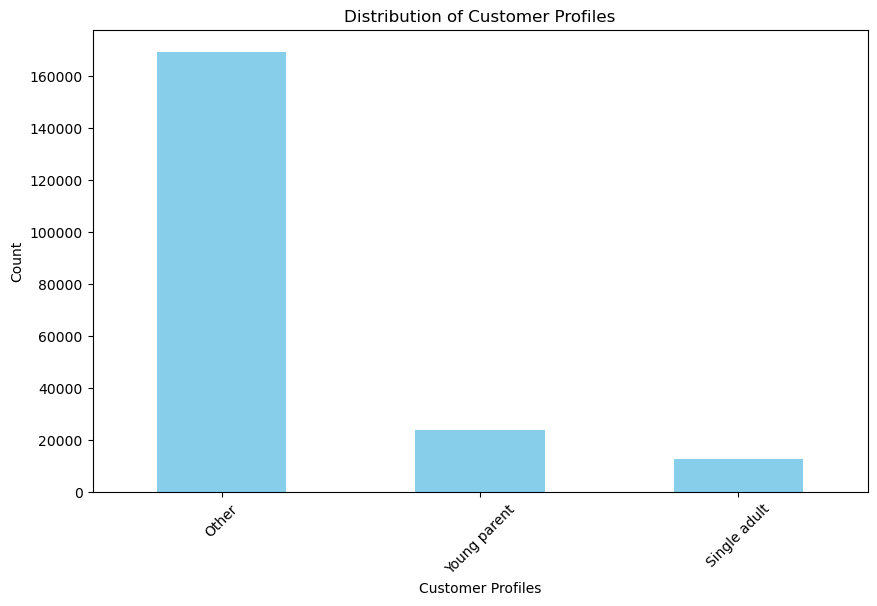

In [8]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize the distribution of customer profiles
plt.figure(figsize=(10, 6))
data['Customer_Profile'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Customer Profiles')
plt.ylabel('Count')
plt.title('Distribution of Customer Profiles')
plt.xticks(rotation=45)
plt.show()


# Step 7: Aggregate the max, mean, and min variables on a customer-profile level

In [10]:
# Group the data by "Customer_Profile" and calculate max, mean, and min variables for usage frequency and expenditure
profile_agg = data.groupby('Customer_Profile').agg({
    'n_dependants': ['max', 'mean', 'min'],
    'income': ['max', 'mean', 'min']
}).reset_index()

# Rename the columns for clarity
profile_agg.columns = ['Customer_Profile', 'Max_n_dependants', 'Mean_n_dependants', 'Min_n_dependants', 'Max_income', 'Mean_income', 'Min_income']

# Display the aggregated data
profile_agg


,Customer_Profile,Max_n_dependants,Mean_n_dependants,Min_n_dependants,Max_income,Mean_income,Min_income
0,Other,3,1.542648,0,593901,98355.396917,25903
1,Single adult,0,0.000000,0,387860,71678.617670,40003
2,Young parent,3,2.002203,1,397929,80745.043059,60004


# Step 8: Compare customer profiles with regions and departments

In [14]:
# Step 8: Compare customer profiles with regions and departments

# Group by 'Customer_Profile', 'Region', and 'department_id'
profile_region_dept_agg = data.groupby(['Customer_Profile', 'Region', 'STATE']).agg({
    'Age': 'mean',   # Calculate the mean spending for each group
    'income': 'mean'    # Calculate the mean order frequency for each group
}).reset_index()

# Rename the columns for clarity
profile_region_dept_agg.columns = ['Customer_Profile', 'Region', 'STATE', 'Mean_income', 'Mean__Age_Frequency']

# Display the aggregated data
profile_region_dept_agg.head((50))

,Customer_Profile,Region,STATE,Mean_income,Mean__Age_Frequency
0,Other,Midwest,Illinois,53.481459,98216.456738
1,Other,Midwest,Indiana,54.072121,99660.854242
2,Other,Midwest,Iowa,53.664803,98019.367863
3,Other,Midwest,Kansas,53.387706,97720.407496
4,Other,Midwest,Michigan,53.690483,98348.413578
5,Other,Midwest,Minnesota,53.983092,99399.673611
6,Other,Midwest,Missouri,53.402472,99318.614411
7,Other,Midwest,Nebraska,53.161738,97916.448099
8,Other,Midwest,North Dakota,53.454436,98350.329624
9,Other,Midwest,Ohio,53.702076,99182.952152


# Step 9: Produce suitable charts to illustrate your results

Create appropriate charts based on your analysis using matplotlib or other visualization libraries.

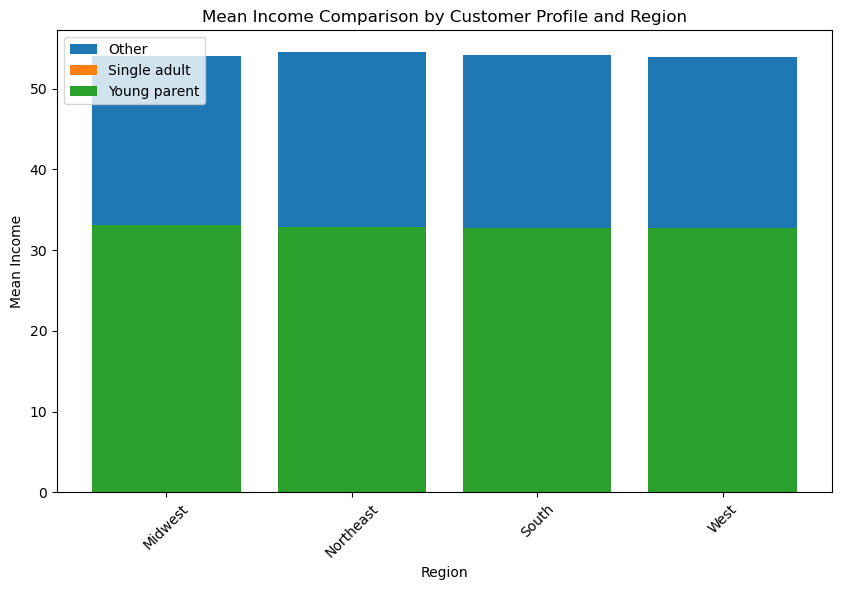

In [16]:
import matplotlib.pyplot as plt

# Create a bar plot for Mean Income comparison by Region
plt.figure(figsize=(10, 6))
for profile in profile_region_dept_agg['Customer_Profile'].unique():
    plt.bar(profile_region_dept_agg[profile_region_dept_agg['Customer_Profile'] == profile]['Region'],
            profile_region_dept_agg[profile_region_dept_agg['Customer_Profile'] == profile]['Mean_income'],
            label=profile)

plt.xlabel('Region')
plt.ylabel('Mean Income')
plt.title('Mean Income Comparison by Customer Profile and Region')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Similarly, you can create a bar plot for mean age comparison by region and customer profile:

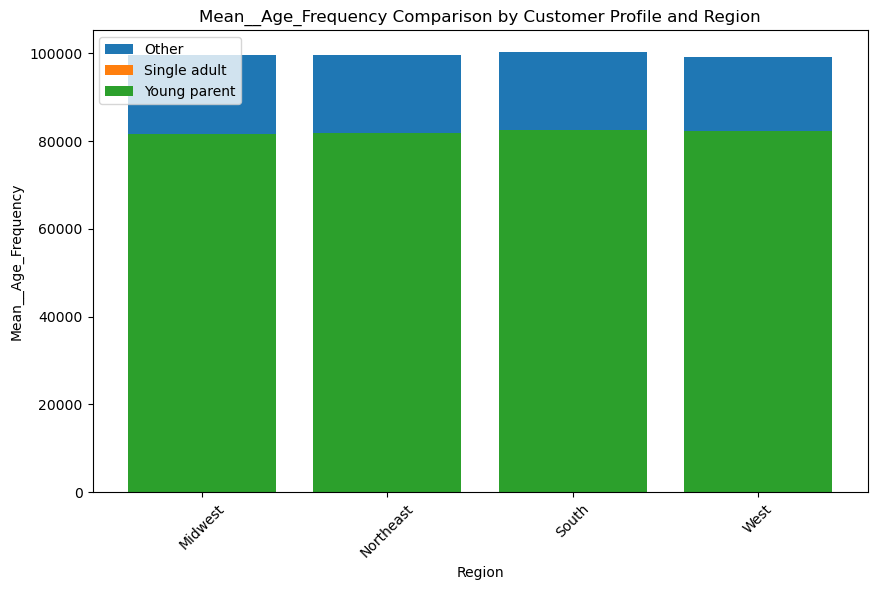

In [23]:
# Create a bar plot for Mean Age comparison by Region
plt.figure(figsize=(10, 6))
for profile in profile_region_dept_agg['Customer_Profile'].unique():
    plt.bar(profile_region_dept_agg[profile_region_dept_agg['Customer_Profile'] == profile]['Region'],
            profile_region_dept_agg[profile_region_dept_agg['Customer_Profile'] == profile]['Mean__Age_Frequency'],
            label=profile)

plt.xlabel('Region')
plt.ylabel('Mean__Age_Frequency')
plt.title('Mean__Age_Frequency Comparison by Customer Profile and Region')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Box Plot: Mean Income Comparison by Customer Profile and Region


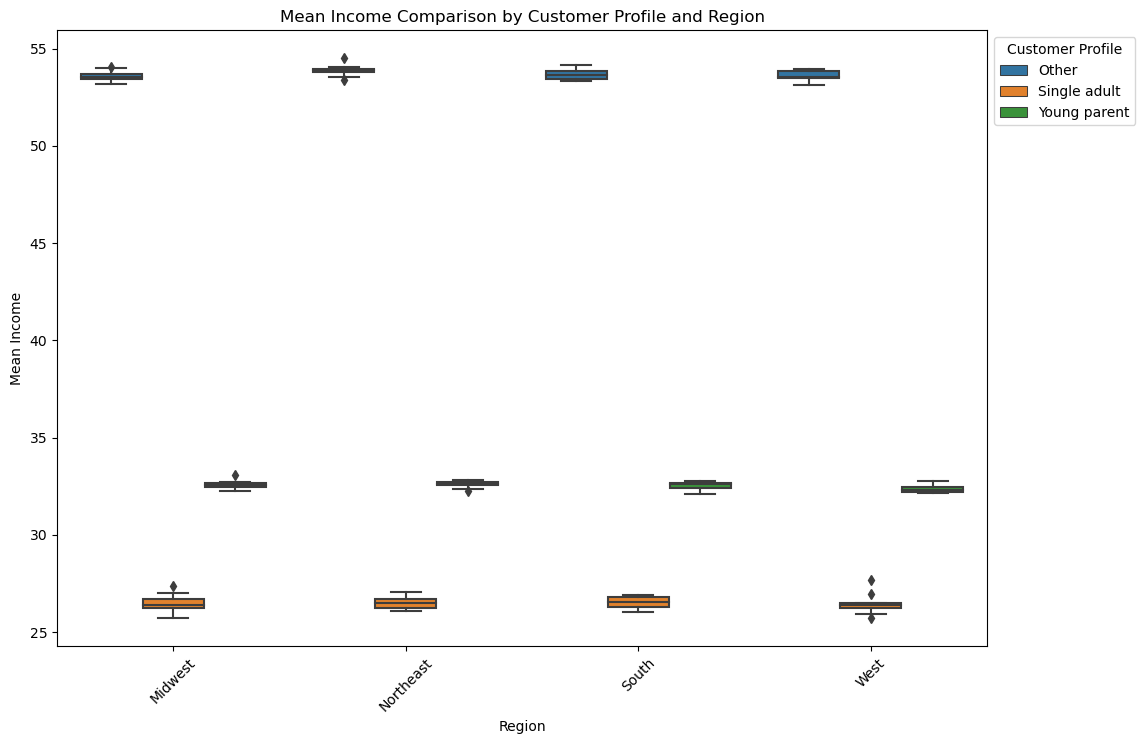

In [24]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Mean_income', hue='Customer_Profile', data=profile_region_dept_agg)
plt.xlabel('Region')
plt.ylabel('Mean Income')
plt.title('Mean Income Comparison by Customer Profile and Region')
plt.xticks(rotation=45)
plt.legend(title='Customer Profile', bbox_to_anchor=(1, 1))
plt.show()


This box plot will show the distribution of mean income for each customer profile across different regions. It will help us identify any variations in income among customer profiles within each region.